# Исходные данные

1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2. Загрузите датасет в pandas DataFrame под названием df.
3. Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
5. Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [9]:
# Загружаем данные
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_collection_markup/train.csv', sep=',')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Первичный анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Сводная статистика по датасету
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Размерность датасета
df.shape

(1460, 81)

In [7]:
# Проверка отсутствующих значений
pd.isna(df).sum()[pd.isna(df).sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Проверка на наличие дубликатов
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Выводы:** <br>
Представленные данные представляют таблицу о недвижимости, состояющую из 1460 строк и 81 столбца.<br>
Проверка на отсутствующие значения в датасете показала, что в некоторых столбцах отсутствует более половины значений. <br>
Дубликаты отсутствуют.<br>
Типы данных в таблице: float64(5), int64(15), object(1)

# Замена отсутствующих значений

In [12]:
# Столбец LotFrontage - 259 значений отсутствует, заполним не достающие значения медианой
median_LotFrontage = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(median_LotFrontage)

In [16]:
# Для категориальных столбцов заменим отсутствующие значения на NaN (Not a Number)
# для обозначения отсутствующих или некорректных данных в числовых столбцах:
df['Alley'] = df['Alley'].fillna('NaN')
df['MasVnrType'] = df['MasVnrType'].fillna('NaN')
df['BsmtQual'] = df['BsmtQual'].fillna('NaN')
df['BsmtCond'] = df['BsmtCond'].fillna('NaN')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NaN')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NaN')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NaN')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NaN')
df['GarageType'] = df['GarageType'].fillna('NaN')
df['GarageFinish'] = df['GarageFinish'].fillna('NaN')
df['GarageQual'] = df['GarageQual'].fillna('NaN')
df['GarageCond'] = df['GarageCond'].fillna('NaN')
df['PoolQC'] = df['PoolQC'].fillna('NaN')
df['Fence'] = df['Fence'].fillna('NaN')
df['MiscFeature'] = df['MiscFeature'].fillna('NaN')

In [17]:
# Для столбцов (MasVnrArea -площадь облицовки, GarageYrBlt-год постройки гаража)
# заменим отсутствующие значения на 0:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [18]:
# Для столбца Electrical-электричество пропущено 1 значение,
# определим наиболее часто встречаемое значение в столбце и заменим
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [19]:
# Заменим все пропущенные значения в столбце Electrical на значение "SBrkr"
df.fillna({'Electrical': 'SBrkr'}, inplace=True)

In [21]:
# Проверка отсутствующих значений
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

**Выводы:** <br>
Замена отсутствующих значений выполнена, проверка выполнена.<br>

# Разведочный анализ данных (EDA)

**1. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?**

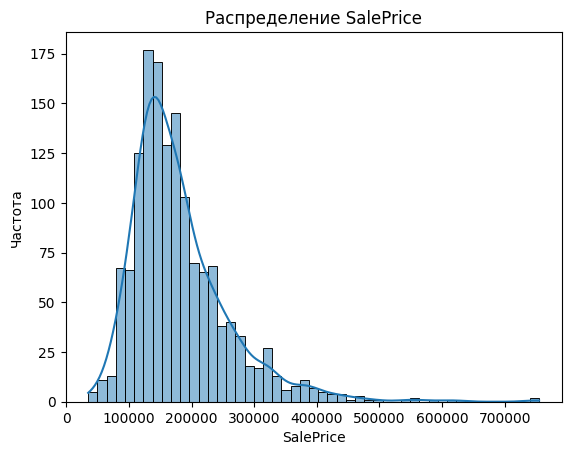

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Построение графика распределения SalePrice
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

**Оценка выбросов для столбца SalePrice**

In [37]:
from scipy import stats
# Вычислим Z-score для столбца SalePrice
z = np.abs(stats.zscore(df['SalePrice']))
print(f'Z-score для столбца SalePrice: {z}')

Z-score для столбца SalePrice: 0       0.347273
1       0.007288
2       0.536154
3       0.515281
4       0.869843
          ...   
1455    0.074560
1456    0.366161
1457    1.077611
1458    0.488523
1459    0.420841
Name: SalePrice, Length: 1460, dtype: float64


In [38]:
# Установка порогового значения Z-score
threshold = 3
# Выявление выбросов на основе Z-score
outliers = df['SalePrice'][z > threshold]
print(f'outliers для столбца SalePrice: {outliers}')

outliers для столбца SalePrice: 58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64


In [39]:
df['SalePrice'].mean()

180921.19589041095

In [40]:
# Замена выбросов медианным значением
df.loc[z > threshold, 'SalePrice'] = df['SalePrice'].median()

In [41]:
df['SalePrice'].mean()

175650.97465753424

**Выводы:** <br>
В рассматриваемом датасете присутствовали выбросы, после замены выбросов медианными значениями средняя цена недвижимости составила 175650.95 (прежднее значение 180921.19).

**2. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?**

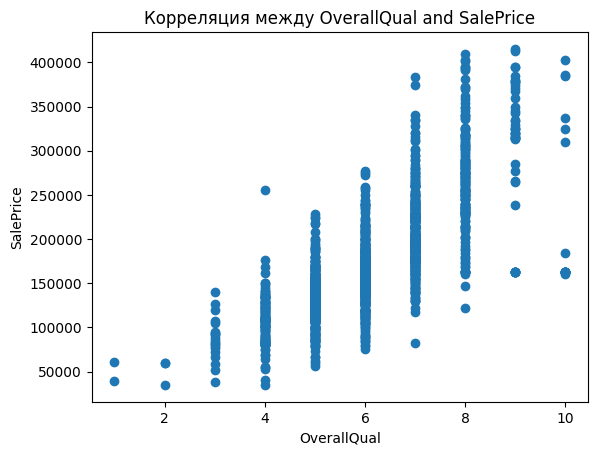

Корреляция между OverallQual и SalePrice: 0.7557140751323215


In [43]:
# Построим график корреляции между OverallQual and SalePrice
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.title('Корреляция между OverallQual and SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Вычисление корреляции
correlation = df['OverallQual'].corr(df['SalePrice'])
print('Корреляция между OverallQual и SalePrice:', correlation)

**Выводы:** <br>
Корреляция присутствует.

**3. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.**


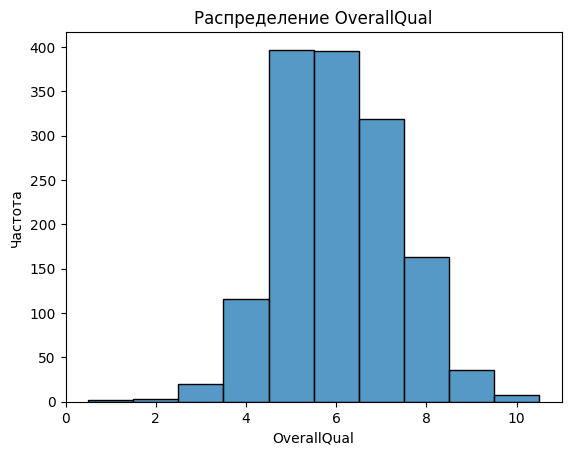

In [53]:
# Построение графика распределения OverallQual
sns.histplot(data=df, x='OverallQual', discrete=True)
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')
plt.show()

**Оценка выбросов для столбца OverallQual**

In [47]:
# Установка порогового значения Z-score
threshold = 3
# Выявление выбросов на основе Z-score
outliers = df['OverallQual'][z > threshold]
print(f'outliers для столбца OverallQual: {outliers}')

outliers для столбца OverallQual: 58      10
178      9
185     10
349      9
389     10
440     10
473      8
496      8
527      9
591     10
664      8
691     10
769      8
798      9
803      9
898      9
1046     9
1142     8
1169    10
1182    10
1243    10
1373    10
Name: OverallQual, dtype: int64


In [48]:
df['OverallQual'].mean()

6.0993150684931505

In [49]:
# Замена выбросов медианным значением
df.loc[z > threshold, 'OverallQual'] = df['OverallQual'].median()

In [50]:
df['OverallQual'].mean()

6.050684931506849

**Выводы:** <br>
Как видно распределение данных для столбца OverallQual нормальное, после удаления выбросов среднее значение фактически не изменилось

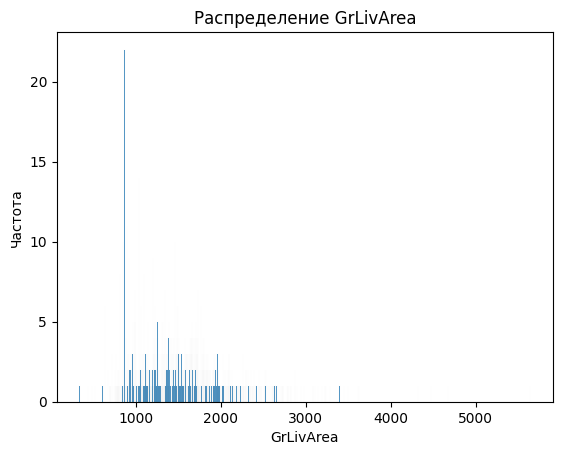

In [54]:
# Построение графика распределения GrLivArea
sns.histplot(data=df, x='GrLivArea', discrete=True)
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')
plt.show()

**Оценка выбросов для столбца GrLivArea**

In [55]:
# Установка порогового значения Z-score
threshold = 3
# Выявление выбросов на основе Z-score
outliers = df['GrLivArea'][z > threshold]
print(f'outliers для столбца GrLivArea: {outliers}')

outliers для столбца GrLivArea: 58      2945
178     2234
185     3608
349     2728
389     2332
440     2402
473     1976
496     3228
527     2713
591     2296
664     2097
691     4316
769     3279
798     3140
803     2822
898     2364
1046    2868
1142    2828
1169    3627
1182    4476
1243    2076
1373    2633
Name: GrLivArea, dtype: int64


In [56]:
df['GrLivArea'].mean()

1515.463698630137

In [57]:
# Замена выбросов медианным значением
df.loc[z > threshold, 'GrLivArea'] = df['GrLivArea'].median()

In [58]:
df['GrLivArea'].mean()

1494.381506849315

**Выводы:** <br>
Как видим для столбца GrLivArea, после удаления выбросов среднее значение значительно уменьшилось.

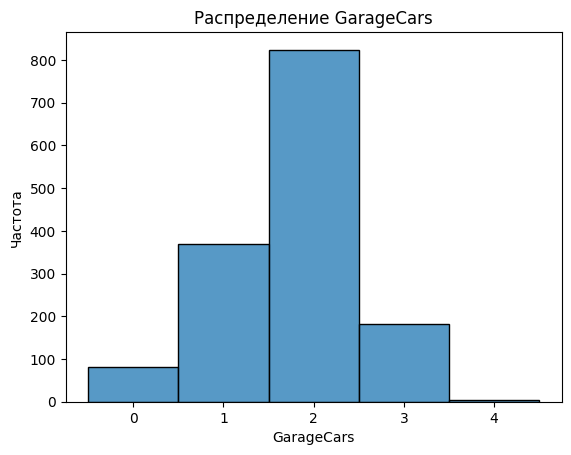

In [59]:
# Построение графика распределения GarageCars
sns.histplot(data=df, x='GarageCars', discrete=True)
plt.title('Распределение GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('Частота')
plt.show()

**Оценка выбросов для столбца GarageCars**

In [60]:
# Установка порогового значения Z-score
threshold = 3
# Выявление выбросов на основе Z-score
outliers = df['GarageCars'][z > threshold]
print(f'outliers для столбца GarageCars: {outliers}')

outliers для столбца GarageCars: 58      3
178     3
185     3
349     3
389     3
440     3
473     3
496     2
527     3
591     3
664     3
691     3
769     3
798     3
803     3
898     3
1046    3
1142    3
1169    3
1182    3
1243    3
1373    3
Name: GarageCars, dtype: int64


In [61]:
df['GarageCars'].mean()

1.7671232876712328

In [62]:
# Замена выбросов медианным значением
df.loc[z > threshold, 'GarageCars'] = df['GarageCars'].median()

In [63]:
df['GarageCars'].mean()

1.7527397260273974

**Выводы:** <br>
Как видим для столбца GarageCars, после удаления выбросов среднее значение фактически не изменилось.

**4. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.**

**4.1. Стоимость недвижимости в зависимости от квадратных метров**

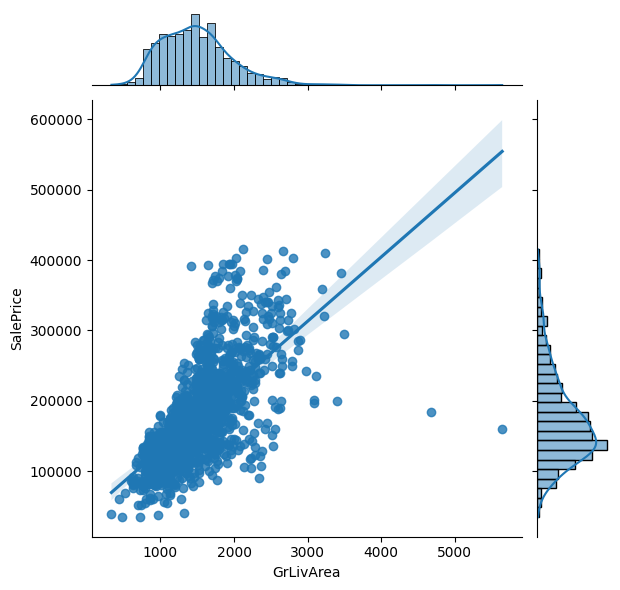

In [65]:
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg');

**Выводы:** <br>
Из графика видно, что стоимость недвижимости растет с увеличением квадратных метров.

**4.2. Стоимость недвижимости в зависимости от отделки дома**

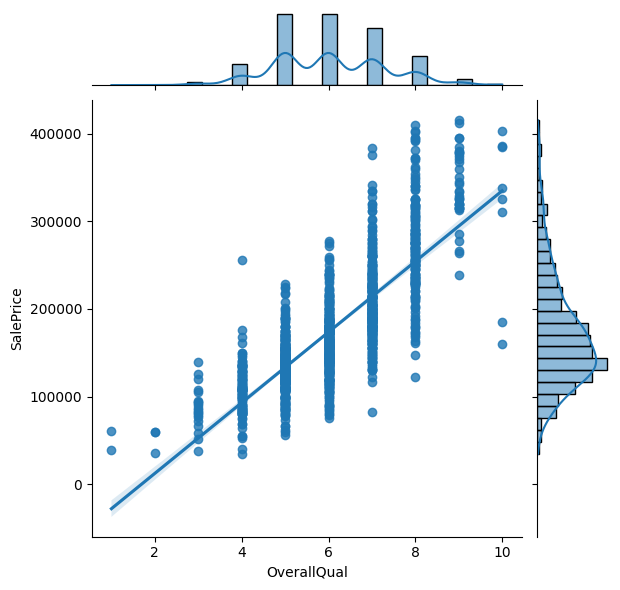

In [67]:
sns.jointplot(x=df['OverallQual'], y=df['SalePrice'], kind='reg');

**Выводы:** <br>
Из графика видно, что стоимость недвижимости растет с увеличением качества отделки

**4.3. Распределение недвижимости по году постройки**

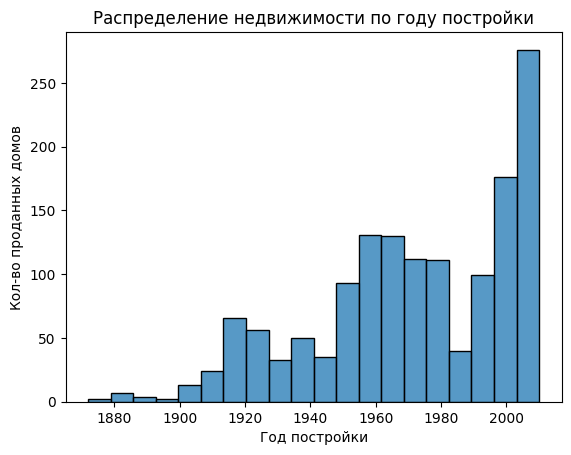

In [71]:
sns.histplot(df['YearBuilt'], bins = 20)
plt.title('Распределение недвижимости по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во проданных домов');

**Вывод:** <br>
 Наиболее часто продаваемые дома - дома, построенные после 2000 года

График корреляции

In [73]:
corr_matrix = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
corr_matrix

,SalePrice,OverallQual,GrLivArea,GarageCars
SalePrice,1.0,0.8,0.7,0.6
OverallQual,0.8,1.0,0.6,0.6
GrLivArea,0.7,0.6,1.0,0.4
GarageCars,0.6,0.6,0.4,1.0


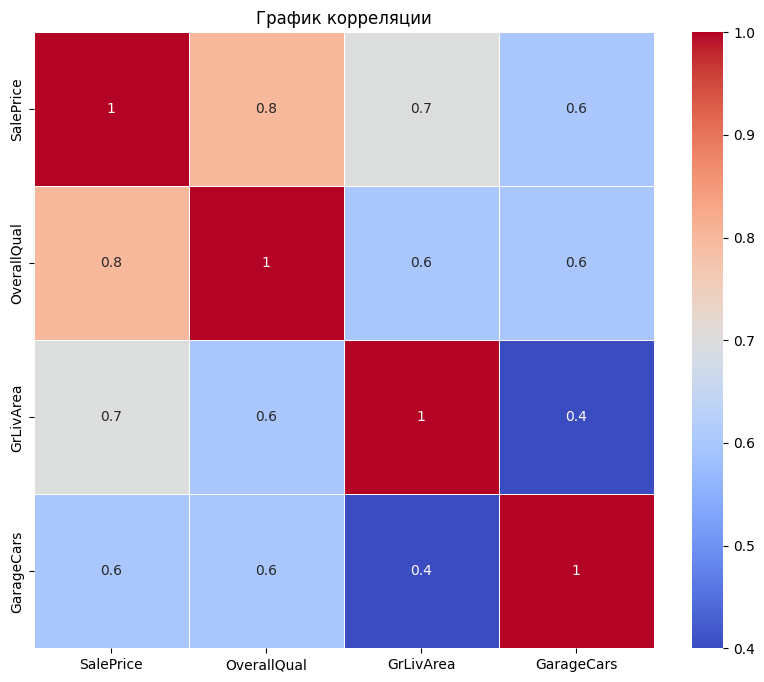

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('График корреляции');

**Вывод:**<br>
График корреляции показывает величину корреляции между значениями (чем выше значение корреляции тем высока зависимость между параметрами).
Как видно из графика корреляция между SalePrice и OverallQual составляет 0.8, что означает что с повышением цены дома увеличивается и качество отделки

# Выполните проектирование признаков путем реализации следующих преобразований: <br>

1. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

In [75]:
# Выполним label encoding столбца MSZoning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'].astype(str))

2. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.


In [76]:
# Добавим столбец с возрастом недвижимости
import datetime
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['YearBuilt']
df['Age'].head()

0     21
1     48
2     23
3    109
4     24
Name: Age, dtype: int64

# Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [77]:
df.to_csv('cleaned_house_prices.csv', index=False)